**ClusterAI 2023**

**Ciencia de Datos - Ingenieria Industrial UTN BA**

En este código nos centraremos en el EDA del dataset de Airbnb.

**Autores:**


*   Fabiana Giorlando
*   Zoe Ibire


In [1]:
# Importamos librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Importamos librerías de Aprendizaje automático
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# Cargamos el dataset.

airbnb = pd.read_csv('/content/drive/My Drive/airbnb_us.csv')


# Compruebamos observando una parte de los datos con ".tail".
# La función ".tail" devuelve las últimas (6) filas.

airbnb.tail(6)

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds,price
19303,16208920,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,flexible,False,DC,...,-77.044241,1BD in heart of Adams Morgan,Kalorama,3,87.0,NaN,20009,1.0,1.0,105.0
19304,18997559,House,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,2.5,Real Bed,flexible,False,DC,...,-76.980518,Charming H St/Rosedale Rowhouse,NaN,3,90.0,https://a0.muscache.com/im/pictures/8ba850b8-7...,20002,2.0,2.0,135.0
19305,18395940,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,2.0,Real Bed,strict,True,Chicago,...,-87.641210,"Amazing 2-BR Apt in Old Town! Eat,Drink,Beach&...",Old Town,15,96.0,https://a0.muscache.com/im/pictures/688bc96a-3...,60610,2.0,3.0,110.0
19306,14838304,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",4,1.0,Real Bed,strict,True,DC,...,-77.028127,Full Rowhouse w/Patio & Balcony,Columbia Heights,19,91.0,https://a0.muscache.com/im/pictures/57358607/3...,20009,1.0,1.0,141.0
19307,11829011,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,moderate,True,SF,...,-122.407384,WorldMark W'ndm Union Square Studio,Union Square,24,98.0,https://a0.muscache.com/im/pictures/9a99e2de-c...,94108,1.0,1.0,170.0
19308,14934112,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,Real Bed,strict,True,Chicago,...,-87.623046,Gold Coast Specialty,NaN,6,100.0,https://a0.muscache.com/im/pictures/32922903/b...,60610,1.0,1.0,78.0


## Limpieza y Reconstrucción de Datos

In [4]:
# Observamos el tamaño del dataset con la función ".shape".

airbnb.shape

(19309, 29)

In [5]:
# Como extra, vemos la cantidad de valores no nulos para cada categoria y su tipo de dato
# con la función ".info"

airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19309 entries, 0 to 19308
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      19309 non-null  int64  
 1   property_type           19309 non-null  object 
 2   room_type               19309 non-null  object 
 3   amenities               19309 non-null  object 
 4   accommodates            19309 non-null  int64  
 5   bathrooms               19274 non-null  float64
 6   bed_type                19309 non-null  object 
 7   cancellation_policy     19309 non-null  object 
 8   cleaning_fee            19309 non-null  bool   
 9   city                    19309 non-null  object 
 10  description             19309 non-null  object 
 11  first_review            15355 non-null  object 
 12  host_has_profile_pic    19306 non-null  object 
 13  host_identity_verified  19306 non-null  object 
 14  host_response_rate      15013 non-null

In [6]:
 # Analizamos los posibles valores que toma para ver si vale la pena.
airbnb.property_type.unique()

array(['House', 'Apartment', 'Loft', 'Townhouse', 'Condominium',
       'Bungalow', 'Guesthouse', 'Dorm', 'Other', 'Bed & Breakfast',
       'Boutique hotel', 'Hostel', 'In-law', 'Boat', 'Guest suite',
       'Castle', 'Timeshare', 'Camper/RV', 'Cabin', 'Serviced apartment',
       'Treehouse', 'Villa', 'Yurt', 'Tent', 'Train', 'Vacation home',
       'Cave'], dtype=object)

In [7]:
 # Analizamos los posibles valores que toma para ver si vale la pena.
airbnb.room_type.unique()

array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object)

In [8]:
#Eliminamos columnas que no nos interesan.
airbnb = airbnb.drop(['id',"amenities", "bed_type","property_type","thumbnail_url", "host_has_profile_pic", "beds","latitude","longitude","name","host_identity_verified","host_response_rate","host_since", "first_review","last_review","review_scores_rating","description"],axis=1)

# Compruebamos observando una parte de los datos con ".tail".

airbnb.tail(6)

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,city,instant_bookable,neighbourhood,number_of_reviews,zipcode,bedrooms,price
19303,Entire home/apt,2,1.0,flexible,False,DC,f,Kalorama,3,20009,1.0,105.0
19304,Entire home/apt,5,2.5,flexible,False,DC,f,NaN,3,20002,2.0,135.0
19305,Entire home/apt,4,2.0,strict,True,Chicago,t,Old Town,15,60610,2.0,110.0
19306,Entire home/apt,4,1.0,strict,True,DC,f,Columbia Heights,19,20009,1.0,141.0
19307,Entire home/apt,2,1.0,moderate,True,SF,f,Union Square,24,94108,1.0,170.0
19308,Entire home/apt,2,1.0,strict,True,Chicago,f,NaN,6,60610,1.0,78.0


In [9]:
# Observamos el tamaño del dataset con la función ".shape".

airbnb.shape

(19309, 12)

In [10]:
# Corroboramos si hay valores nulos(NaNs).

col_nulls = airbnb.isnull().any()
col_nulls

room_type              False
accommodates           False
bathrooms               True
cancellation_policy    False
cleaning_fee           False
city                   False
instant_bookable       False
neighbourhood           True
number_of_reviews      False
zipcode                 True
bedrooms                True
price                  False
dtype: bool

In [11]:
# Para poder determinar los nombres de cada columna, el tipo de dato y la cantidad de no nulos en una linea de codigo
# utilizando la funcion ".agg" para agrupar operaciones sobre un mismo eje, la funcion "col" crea el cuadro
# para contar la cantidad de nulos utilizo la función "lambda", en donde "x" representa la columna actual
# y "x.isnull().sum()"" cuenta cuántos valores nulos hay en esa columna.
# ".T" es una transposición del resultado para que se observe mejor.

airbnb.agg({col: ['name', 'dtype', lambda x: x.isnull().sum()] for col in airbnb.columns}).T

,name,dtype,<lambda>
room_type,room_type,object,0
accommodates,accommodates,int64,0
bathrooms,bathrooms,float64,35
cancellation_policy,cancellation_policy,object,0
cleaning_fee,cleaning_fee,bool,0
city,city,object,0
instant_bookable,instant_bookable,object,0
neighbourhood,neighbourhood,object,1458
number_of_reviews,number_of_reviews,int64,0
zipcode,zipcode,object,225


In [12]:
# Como extra, vemos la cantidad de valores no nulos para cada categoria y su tipo de dato
# con la función ".info"

airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19309 entries, 0 to 19308
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   room_type            19309 non-null  object 
 1   accommodates         19309 non-null  int64  
 2   bathrooms            19274 non-null  float64
 3   cancellation_policy  19309 non-null  object 
 4   cleaning_fee         19309 non-null  bool   
 5   city                 19309 non-null  object 
 6   instant_bookable     19309 non-null  object 
 7   neighbourhood        17851 non-null  object 
 8   number_of_reviews    19309 non-null  int64  
 9   zipcode              19084 non-null  object 
 10  bedrooms             19292 non-null  float64
 11  price                19309 non-null  float64
dtypes: bool(1), float64(3), int64(2), object(6)
memory usage: 1.6+ MB


In [13]:
# Rellenamos los nulos de neighbourhood usando los datos de zipcode para averiguarlos.
airbnb['neighbourhood'] = (airbnb.groupby('zipcode')['neighbourhood'].transform('first'))

In [14]:
# Compruebamos observando una parte de los datos con ".tail".
airbnb.tail(20)

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,city,instant_bookable,neighbourhood,number_of_reviews,zipcode,bedrooms,price
19289,Private room,2,1.0,moderate,True,DC,f,Kingman Park,1,20002,1.0,75.0
19290,Entire home/apt,4,1.0,moderate,True,Chicago,f,Pilsen,89,60608,1.0,69.0
19291,Entire home/apt,5,2.5,strict,True,DC,f,Kingman Park,21,20002,3.0,225.0
19292,Entire home/apt,3,1.0,moderate,True,SF,f,Inner Sunset,8,94122,1.0,140.0
19293,Entire home/apt,3,1.0,strict,True,DC,f,Columbia Heights,6,20009,1.0,175.0
19294,Private room,6,1.0,strict,True,DC,f,Michigan Park,4,20017,1.0,48.0
19295,Private room,2,1.0,flexible,False,Boston,f,Jamaica Plain,5,02130,1.0,100.0
19296,Private room,2,1.0,flexible,True,SF,f,Mission Terrace,19,94112,1.0,80.0
19297,Private room,3,1.0,strict,True,DC,t,Dupont Circle,11,20036,2.0,95.0
19298,Entire home/apt,5,1.0,strict,True,Boston,f,Fenway/Kenmore,12,02215,2.0,150.0


In [15]:
# Dropeamos todos los rows que tengan valores nulos ya que son pocos en relación a la cantidad.
airbnb.dropna(axis=0,how = 'any',inplace = True)
#  Dropeamos la columna zipcode ya que no resulta de utilidad.
airbnb = airbnb.drop('zipcode', axis=1)

In [16]:
# Vemos la cantidad de valores no nulos para cada categoria y su tipo de dato
# con la función ".info".
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19022 entries, 0 to 19308
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   room_type            19022 non-null  object 
 1   accommodates         19022 non-null  int64  
 2   bathrooms            19022 non-null  float64
 3   cancellation_policy  19022 non-null  object 
 4   cleaning_fee         19022 non-null  bool   
 5   city                 19022 non-null  object 
 6   instant_bookable     19022 non-null  object 
 7   neighbourhood        19022 non-null  object 
 8   number_of_reviews    19022 non-null  int64  
 9   bedrooms             19022 non-null  float64
 10  price                19022 non-null  float64
dtypes: bool(1), float64(3), int64(2), object(5)
memory usage: 1.6+ MB


In [17]:
# Observamos el tamaño del dataset con la función ".shape".
airbnb.shape

(19022, 11)

## Análisis Exploratorio de Datos (EDA)

In [18]:
# Analizamos algunos valores estadísticos de las variables "bathrooms", "rooms", "bedrooms", "surface_total", "surface_covered", "valor_m2".

airbnb[['bedrooms', 'cleaning_fee', 'accommodates','bathrooms','room_type','cancellation_policy', 'number_of_reviews', 'price']].describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,19022.0,1.362633,0.902320,0.0,1.0,1.0,2.0,10.0
accommodates,19022.0,3.431658,2.209883,1.0,2.0,3.0,4.0,16.0
bathrooms,19022.0,1.277232,0.587860,0.0,1.0,1.0,1.5,8.0
number_of_reviews,19022.0,25.221375,44.522190,0.0,1.0,7.0,28.0,542.0
price,19022.0,195.318946,202.334126,10.0,87.0,135.0,220.0,1999.0


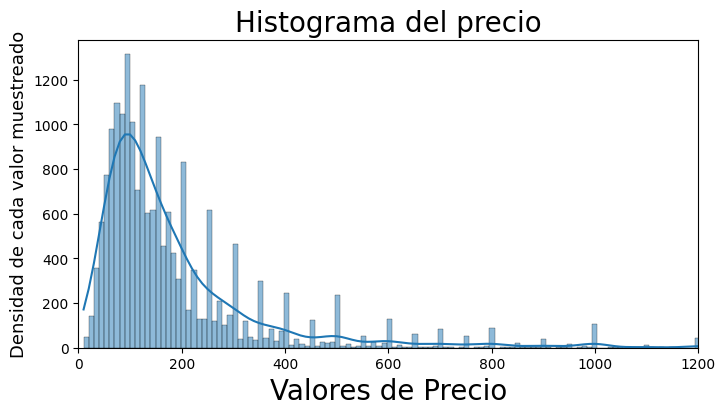

In [19]:
# Utilizamos la función "histplot" para ver el histograma de la variable BMI.
# La función "fig, ax = plt.subplots" me permite determinar el tamaño del diagrama.

fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(airbnb.price, kde=True)

# Definimos los indices y el tamaño de cada eje.

plt.title("Histograma del precio", size = 20)
plt.xlabel("Valores de Precio", size = 20)
plt.ylabel("Densidad de cada valor muestreado", size = 13)
plt.xlim(0, 1200)

# Visualizamos el histograma.

plt.show()

In [20]:
# Analizamos estadisticamente la columna precio.
airbnb.price.describe().T

count    19022.000000
mean       195.318946
std        202.334126
min         10.000000
25%         87.000000
50%        135.000000
75%        220.000000
max       1999.000000
Name: price, dtype: float64

<ipython-input-21-31310e44a1eb>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(airbnb[airbnb['city'] == city]["price"], label=city, shade=False)
<ipython-input-21-31310e44a1eb>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(airbnb[airbnb['city'] == city]["price"], label=city, shade=False)
<ipython-input-21-31310e44a1eb>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(airbnb[airbnb['city'] == city]["price"], label=city, shade=False)
<ipython-input-21-31310e44a1eb>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your

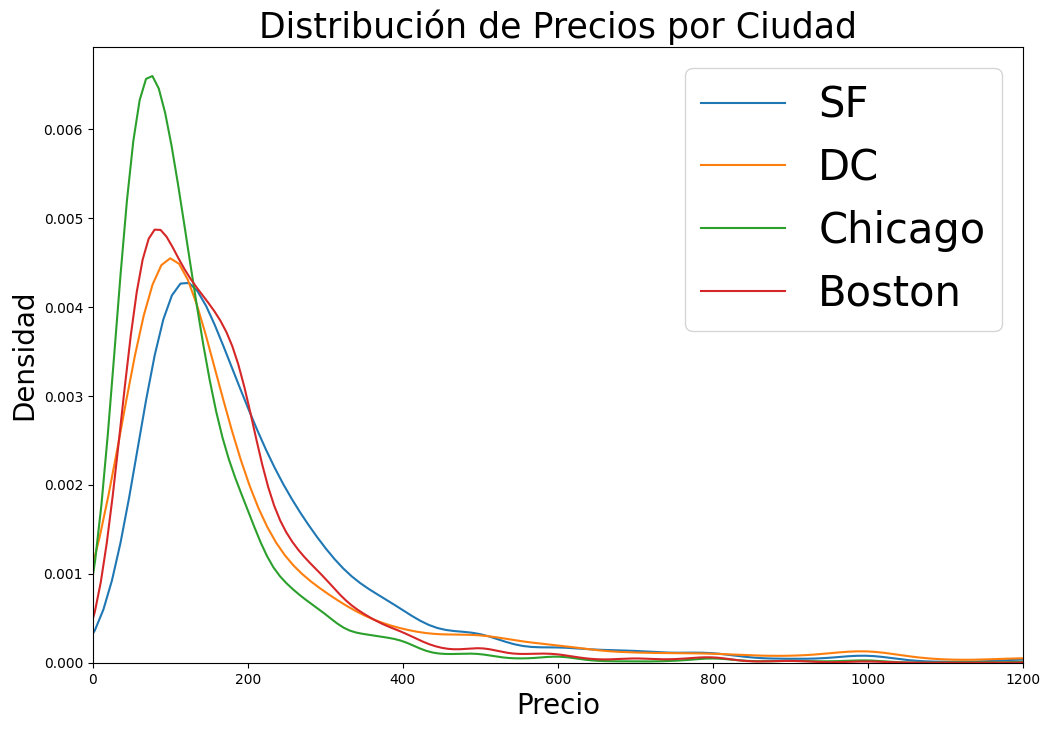

In [21]:
# Configuración de la figura con un tamaño específico
plt.figure(figsize=(12, 8))

# Distribución de 'price' para cada valor único de 'city'.
for city in airbnb['city'].unique():
    sns.kdeplot(airbnb[airbnb['city'] == city]["price"], label=city, shade=False)

# Mostramos el gráfico
# Ajustamos límites del eje x para mejorar la visualización.
plt.xlim(0, 1200)
plt.title('Distribución de Precios por Ciudad', fontsize=25)  # Ajusta el tamaño de la fuente del título
plt.xlabel('Precio', fontsize=20)  # Ajusta el tamaño de la fuente del eje x
plt.ylabel('Densidad', fontsize=20)  # Ajusta el tamaño de la fuente del eje y
plt.legend(fontsize=30)  # Ajusta el tamaño de la fuente de la leyenda
plt.show()



In [22]:
# Calculamos el percentil 5 (Q5) y el Percentil 95 (Q95) de la variable "price"

Q95 = airbnb['price'].quantile(0.95)
print(f"El valor del percentil 95 es: {Q95}")
Q5= airbnb['price'].quantile(0.05)
print(f"El valor del percentil 5 es: {Q5}")

El valor del percentil 95 es: 567.8500000000029
El valor del percentil 5 es: 46.0


<Figure size 1000x600 with 0 Axes>

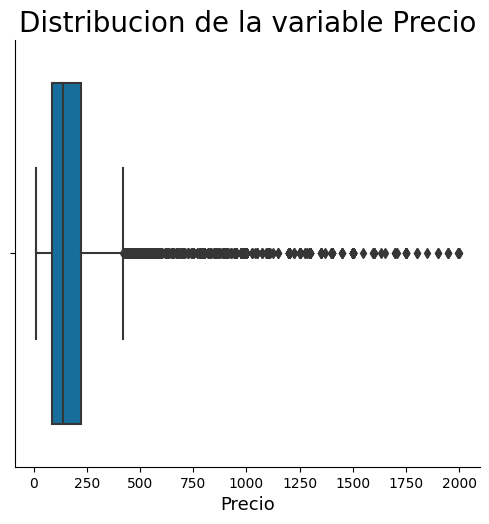

In [23]:
# Utilizamos la función "boxplot" para ver la distribución de la variable Precio.
# La función "plt.figure" me permite determinar el tamaño del diagrama.

# Utilizamos catplot con el tipo de gráfico "boxplot"
plt.figure(figsize=(10, 6))
sns.catplot(x="price", kind="box", data=airbnb, palette="colorblind")

# Definimos los títulos y etiquetas de los ejes
plt.xlabel("Precio", size=13)
plt.title("Distribucion de la variable Precio", size=20)

# Mostramos el gráfico
plt.show()


In [24]:
# Filtramos el DataFrame para eliminar valores por debajo de Q5 y por encima de Q95
airbnb = airbnb[(airbnb['price'] >= Q5) & (airbnb['price'] <= Q95)]


In [25]:
# Calculamos del percentil 5 (Q5) y el Percentil 95 (Q95) de la variable "bathrooms".
Q5 = airbnb['bathrooms'].quantile(0.05)
Q95 = airbnb['bathrooms'].quantile(0.95)

# Filtramos el DataFrame para eliminar valores por debajo de Q5 y por encima de Q95.
airbnb = airbnb[(airbnb['bathrooms'] >= Q5) & (airbnb['bathrooms'] <= Q95)]


In [26]:
# Calculamos del percentil 5 (Q5) y el Percentil 95 (Q95) de la variable "bedrooms"
Q5 = airbnb['bedrooms'].quantile(0.05)
Q95 = airbnb['bedrooms'].quantile(0.95)

# Filtramos el DataFrame para eliminar valores por debajo de Q5 y por encima de Q95
airbnb = airbnb[(airbnb['bedrooms'] >= Q5) & (airbnb['bedrooms'] <= Q95)]

In [27]:
# Calculamos del percentil 5 (Q5) y el Percentil 95 (Q95) de la variable "accommodates".
Q5 = airbnb['accommodates'].quantile(0.05)
Q95 = airbnb['accommodates'].quantile(0.95)

# Filtramos el DataFrame para eliminar valores por debajo de Q5 y por encima de Q95
airbnb = airbnb[(airbnb['accommodates'] >= Q5) & (airbnb['accommodates'] <= Q95)]

<Figure size 1000x600 with 0 Axes>

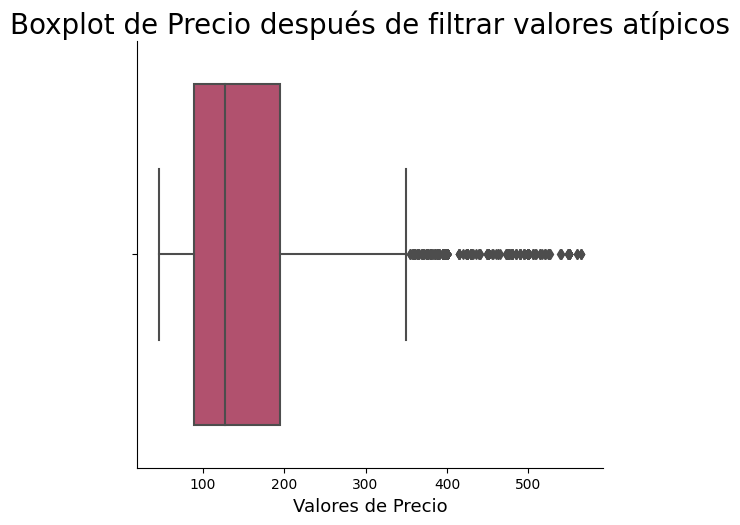

In [28]:
# Utilizamos catplot con el tipo de gráfico "boxplot" para ver el precio.
plt.figure(figsize=(10, 6))
sns.catplot(x="price", kind="box", data=airbnb, palette="flare")

# Definimos los títulos y etiquetas de los ejes.
plt.xlabel("Valores de Precio", size=13)
plt.title('Boxplot de Precio después de filtrar valores atípicos', size=20)

# Mostramos el gráfico.
plt.show()

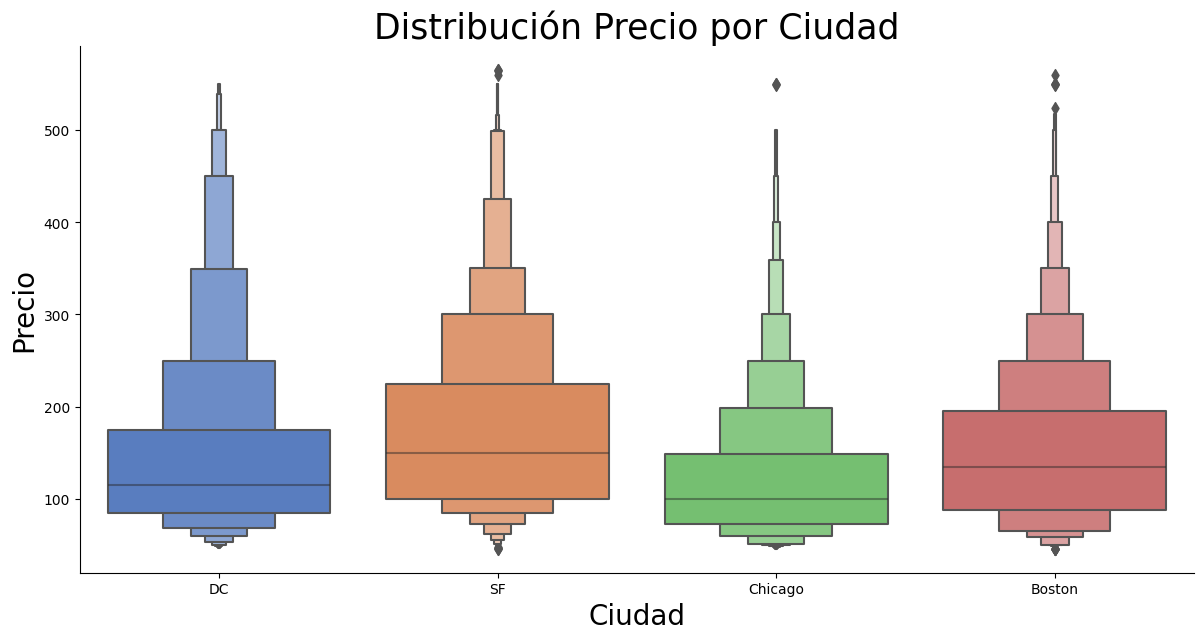

In [29]:
# Utilizamos catplot con el tipo de gráfico "boxplot" para ver la distribucion del precio por ciudad.
g = sns.catplot(data=airbnb,
                x='city',y='price',
                kind="boxen",palette = "muted",height = 6, aspect = 2)
# Visualizamos.
plt.title('Distribución Precio por Ciudad', fontsize=25)
plt.ylabel('Precio', fontsize=20)  # Ajusta el tamaño de la fuente del eje x
plt.xlabel('Ciudad', fontsize=20)  # Ajusta el tamaño de la fuente del eje y
plt.show()

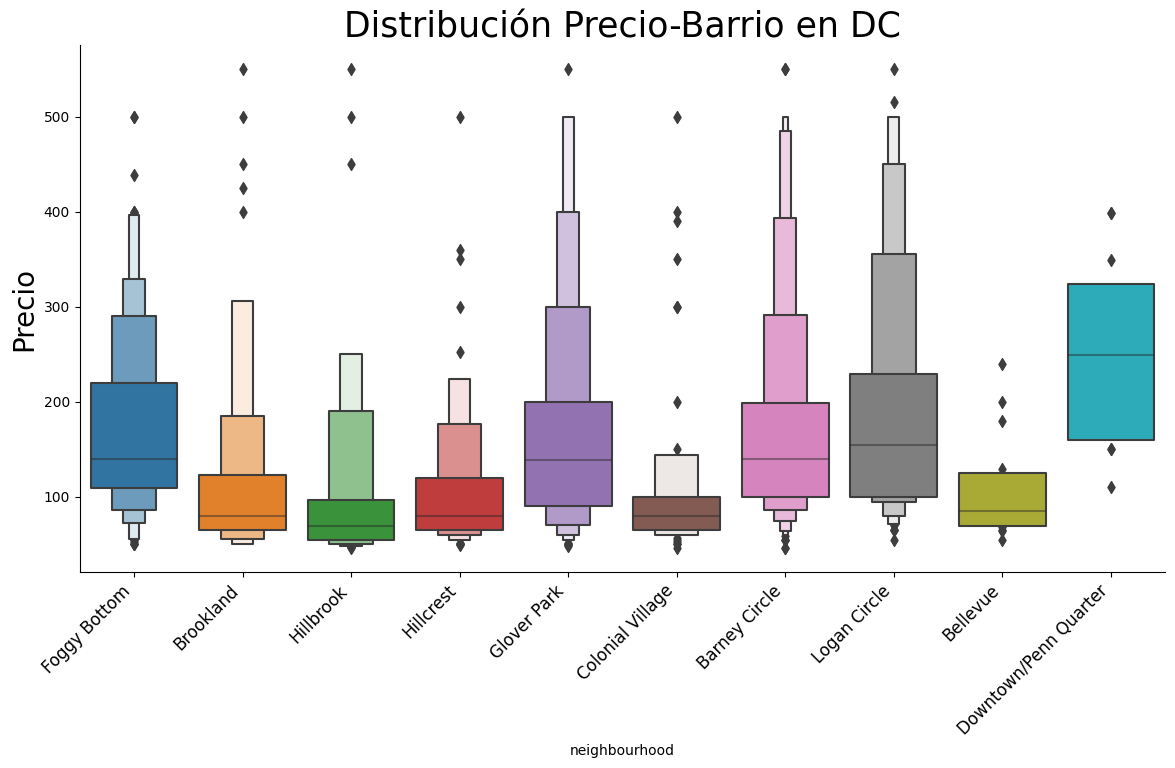

In [30]:
# Filtramos las categorías con al menos 10 filas.
categorias_con_suficientes_filas = airbnb['neighbourhood'].value_counts()[airbnb['neighbourhood'].value_counts() >= 10].index
airbnb_filtrado = airbnb[airbnb['neighbourhood'].isin(categorias_con_suficientes_filas)]

# Filtramos solo las filas donde la columna 'city' es igual a 'DC'.
airbnb_filtrado_dc = airbnb_filtrado[airbnb_filtrado['city'] == 'DC']

# Obtenemos las top 5 y bottom 5 categorías en relación con 'price'.
top_5_neighbourhoods = airbnb_filtrado_dc.groupby('neighbourhood')['price'].median().nlargest(5).index
bottom_5_neighbourhoods = airbnb_filtrado_dc.groupby('neighbourhood')['price'].median().nsmallest(5).index

# Unimos las top 5 y bottom 5 categorías y ordenarlas por la mediana de 'price'.
neighbourhoods_to_plot = sorted(top_5_neighbourhoods.union(bottom_5_neighbourhoods),
                                key=lambda x: airbnb_filtrado_dc.groupby('neighbourhood')['price'].median()[x])

# Filtramos el DataFrame para incluir solo las categorías seleccionadas.
airbnb_filtrado_top_bottom = airbnb_filtrado_dc[airbnb_filtrado_dc['neighbourhood'].isin(neighbourhoods_to_plot)]

# Creamos el catplot con los datos filtrados.
sns.catplot(x='neighbourhood', y='price', data=airbnb_filtrado_top_bottom, kind='boxen', height=6, aspect=2)
plt.title('Distribución Precio-Barrio en DC', fontsize=25)
plt.ylabel('Precio', fontsize=20)  # Ajusta el tamaño de la fuente del eje x
plt.xticks(rotation=45, ha="right",fontsize=12)
plt.show()



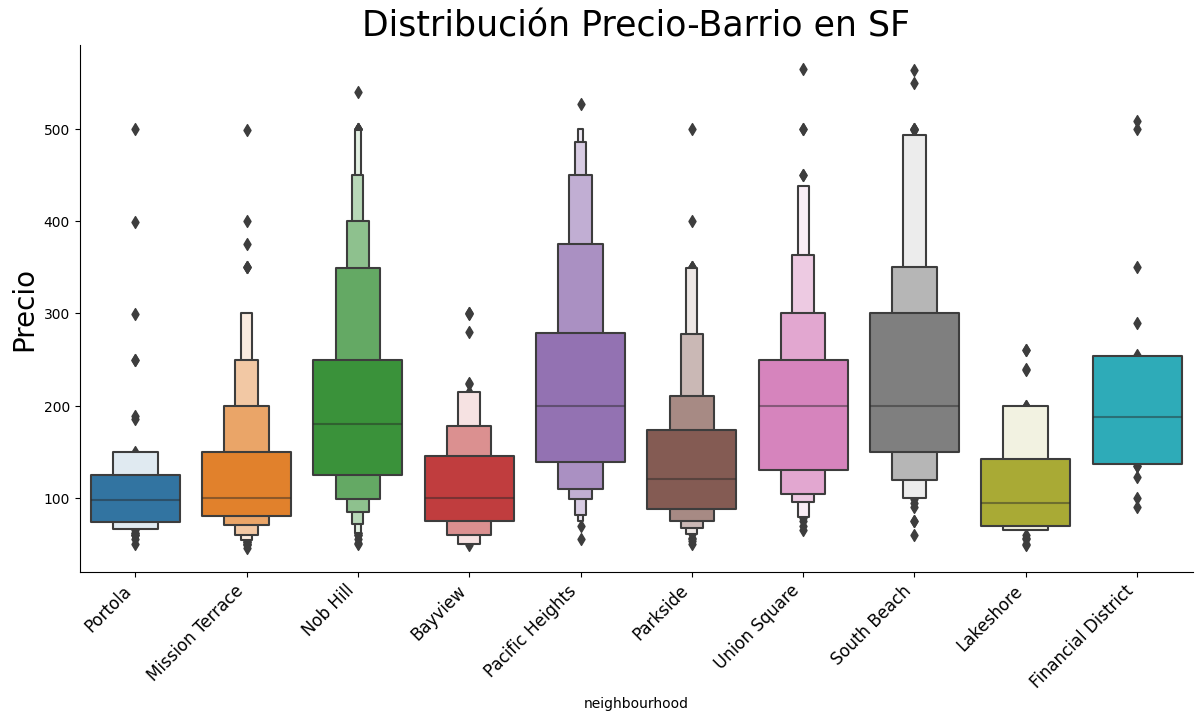

In [31]:
# Filtraamos categorías con al menos 10 filas
categorias_con_suficientes_filas = airbnb['neighbourhood'].value_counts()[airbnb['neighbourhood'].value_counts() >= 10].index
airbnb_filtrado = airbnb[airbnb['neighbourhood'].isin(categorias_con_suficientes_filas)]

# Filtramos solo las filas donde la columna 'city' es igual a 'SF'
airbnb_filtrado_sf = airbnb_filtrado[airbnb_filtrado['city'] == 'SF']

# Obtenemops las top 5 y bottom 5 categorías en relación con 'price'
top_5_neighbourhoods = airbnb_filtrado_sf.groupby('neighbourhood')['price'].median().nlargest(5).index
bottom_5_neighbourhoods = airbnb_filtrado_sf.groupby('neighbourhood')['price'].median().nsmallest(5).index

# Unimos las top 5 y bottom 5 categorías y ordenarlas por la mediana de 'price'
neighbourhoods_to_plot = sorted(top_5_neighbourhoods.union(bottom_5_neighbourhoods),
                                key=lambda x: airbnb_filtrado_sf.groupby('neighbourhood')['price'].median()[x])

# Filtramos el DataFrame para incluir solo las categorías seleccionadas
airbnb_filtrado_top_bottom = airbnb_filtrado_sf[airbnb_filtrado_sf['neighbourhood'].isin(neighbourhoods_to_plot)]

# Creamos el catplot con los datos filtrados.
sns.catplot(x='neighbourhood', y='price', data=airbnb_filtrado_top_bottom, kind='boxen', height=6, aspect=2)
# Visualizamos.
plt.title('Distribución Precio-Barrio en SF', fontsize=25)
plt.ylabel('Precio', fontsize=20)  # Ajusta el tamaño de la fuente del eje x
plt.xticks(rotation=45, ha="right",fontsize=12)
plt.show()


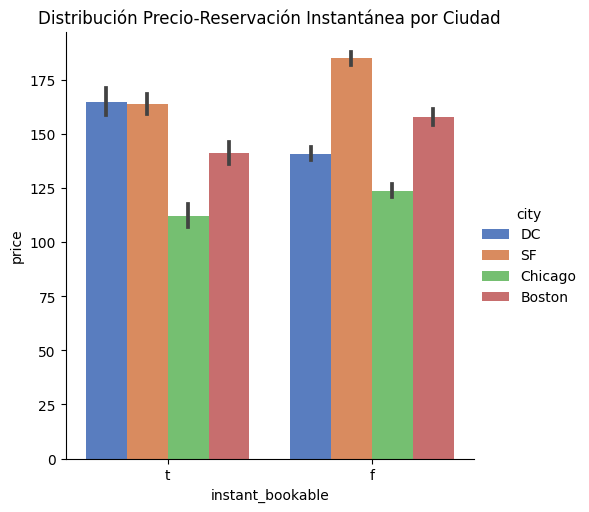

In [32]:
# Utilizamos catplot con el tipo de gráfico para ver la distribucion del precio y la reservacion instantanea por ciudad.
filter = sns.catplot(data=airbnb,
                x='instant_bookable',y='price',hue = 'city',
                kind="bar",palette = "muted")
# Visualizamos.
plt.title('Distribución Precio-Reservación Instantánea por Ciudad')
plt.show()

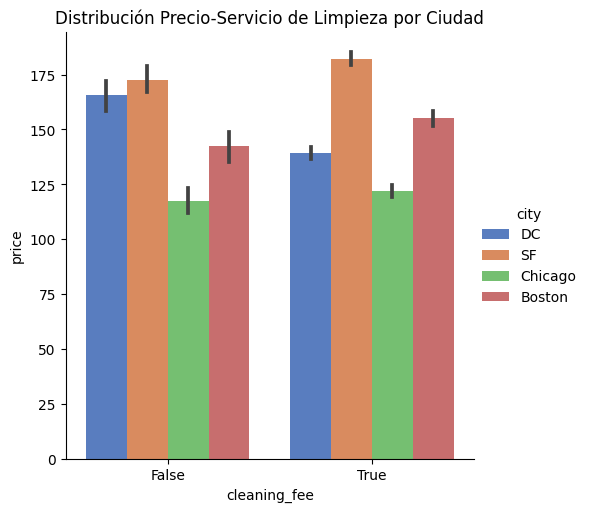

In [33]:
# Utilizamos catplot con el tipo de gráfico para ver la distribucion del precio y el servicio de limpieza por ciudad.
filter = sns.catplot(data=airbnb,
                x='cleaning_fee',y='price',hue = 'city',
                kind="bar",palette = "muted")
# Visualizamos
plt.title('Distribución Precio-Servicio de Limpieza por Ciudad')
plt.show()

In [34]:
# dropeamos
airbnb = airbnb.drop(['cleaning_fee','instant_bookable'], axis=1)

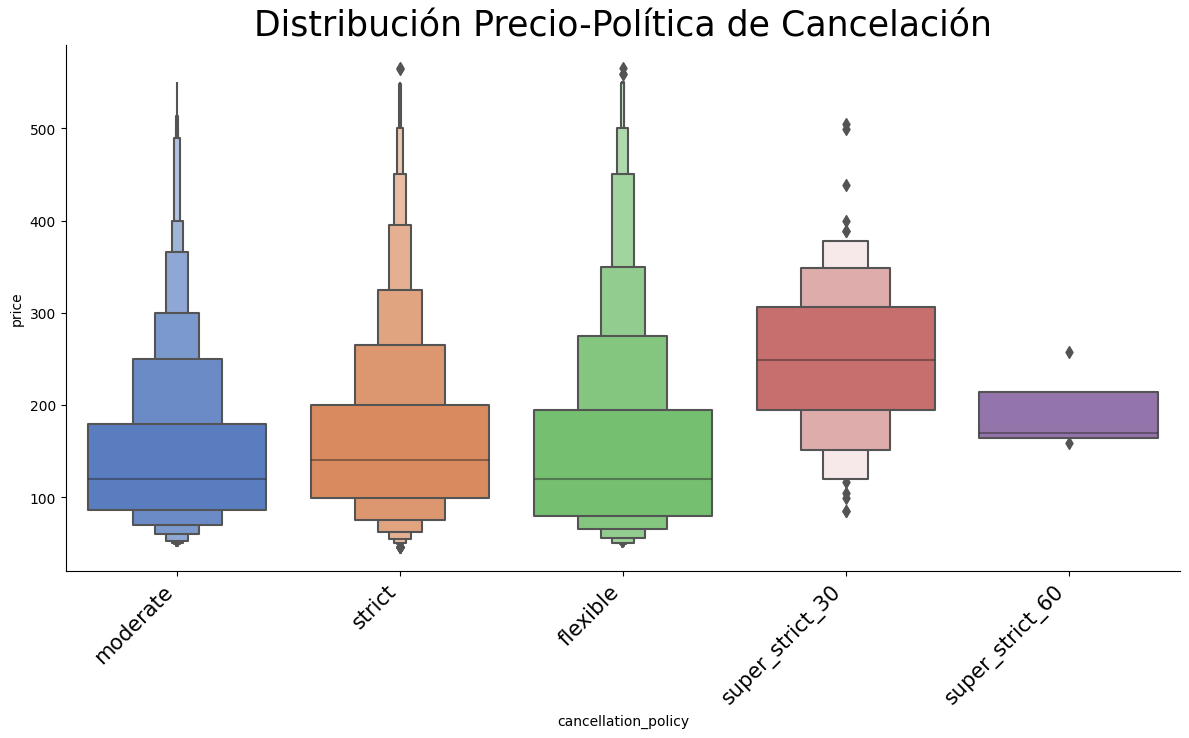

<Figure size 1200x800 with 0 Axes>

In [35]:
# Utilizamos catplot con el tipo de gráfico "boxplot" para ver la distribucion del precio con la politica de cancelacion, con los datos filtrados.
filter = sns.catplot(data=airbnb,
                     x='cancellation_policy', y='price',
                     kind="boxen", palette="muted",height = 6, aspect = 2)
plt.title('Distribución Precio-Política de Cancelación',fontsize = 25)
# Ajustar etiquetas en el eje x
plt.xticks(rotation=45, ha="right",fontsize = 15)

# visualizamos
plt.figure(figsize=(12, 8))
plt.show()

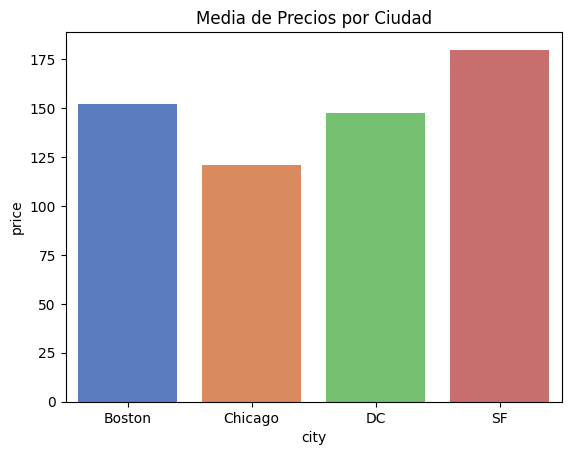

<Figure size 1200x800 with 0 Axes>

In [36]:
# Calculamos las medias de precio por ciudad
mean_prices_by_city = airbnb.groupby('city')['price'].mean().reset_index()

# Creamos el histograma de las medias de precio por ciudad
sns.barplot(x='city', y='price', data=mean_prices_by_city, palette='muted')

# Mostrar el gráfico
plt.title('Media de Precios por Ciudad')
plt.figure(figsize=(12, 8))
plt.show()

<ipython-input-37-3683fdb0fa21>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrd = airbnb.corr()


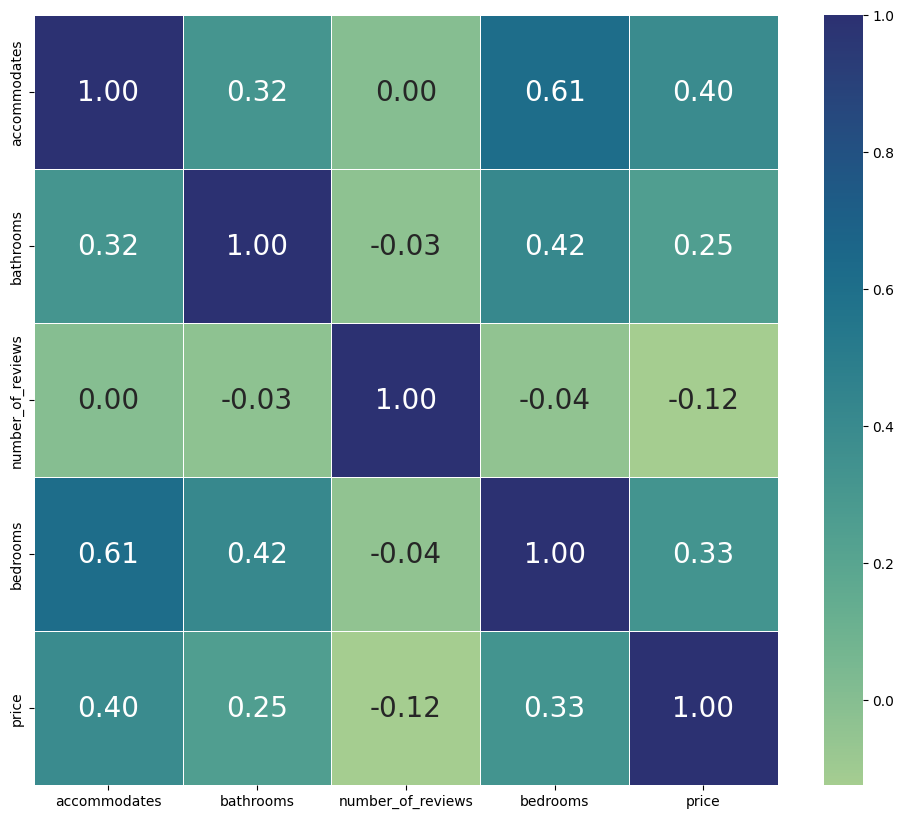

In [37]:
# Utilizamos la función "heatmap" sobre el dataset para ver la correlación de las variables.
# La función "fig, ax = plt.subplots" me permite determinar el tamaño del diagrama.

fig, ax = plt.subplots(figsize=(12, 10))
corrd = airbnb.corr()

# Ajustamos el tamaño de la letra en el heatmap y en los ejes
sns.heatmap(corrd, annot=True, cmap="crest", annot_kws={"size": 20}, fmt=".2f", linewidths=.5)

# Visualizamos el heatmap.
plt.show()


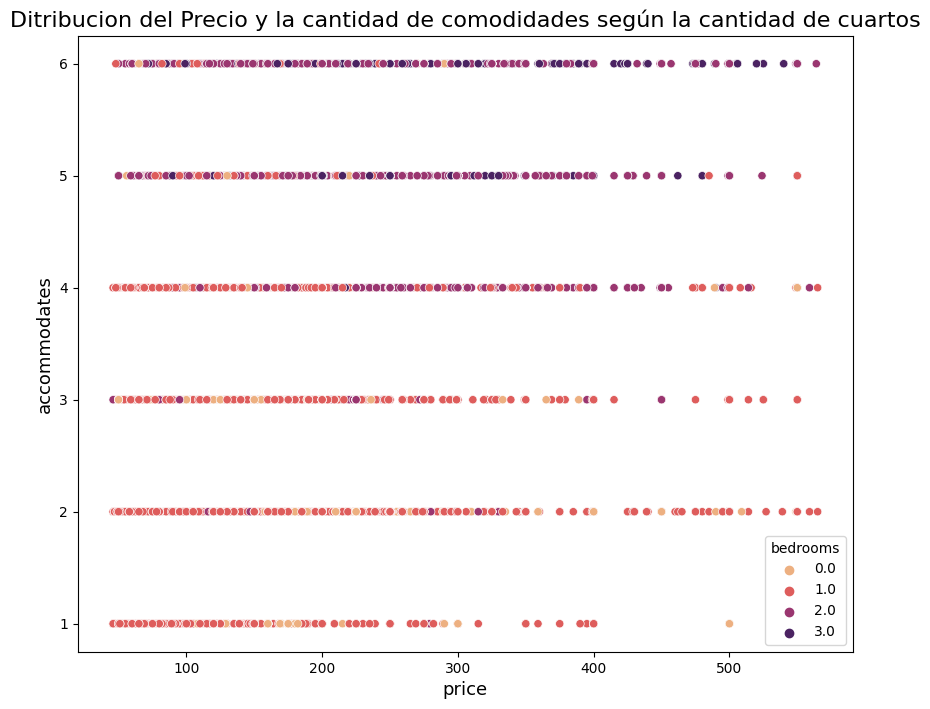

In [38]:
# Utilizamos la función "scatterplot" para mostrar cómo se distribuye el precio y la cantidad de comodidades según la cantidad de cuartos.
# La función "plt.figure" me permite determinar el tamaño del diagrama.

plt.figure(figsize=(10, 8))
sns.scatterplot(data=airbnb, x='price', y='accommodates', hue='bedrooms', palette="flare")

# Definimos los indices y el tamaño de cada eje.

plt.xlabel('price', size = 13)
plt.ylabel('accommodates', size = 13)
plt.title('Ditribucion del Precio y la cantidad de comodidades según la cantidad de cuartos', size = 16)
plt.legend(title='bedrooms')

# Visualizamos el Scatterplot.

plt.show()